In [1]:
import numpy as np  
import pandas as pd 
import os
import re   
import nltk  
from nltk.corpus import stopwords  
from nltk.stem.porter import *   
from sklearn.model_selection import train_test_split 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import emoji
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
#loading dataset
data = pd.read_csv("data/Twitter_Data.csv")
data.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
#checking for missing data (null data)
data.isnull().sum()
data.shape

(162980, 2)

In [4]:
#dropping missing data
data.dropna(axis=0, inplace=True)
data.shape  #data dimensions

(162969, 2)

In [5]:
#mapping tweet categories
data['category'] = data['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


<AxesSubplot:xlabel='category'>

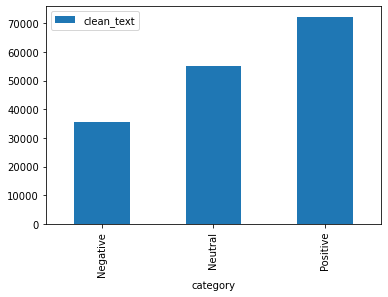

In [6]:
#distribution of sentiments
data.groupby('category').count().plot(kind='bar')

<AxesSubplot:>

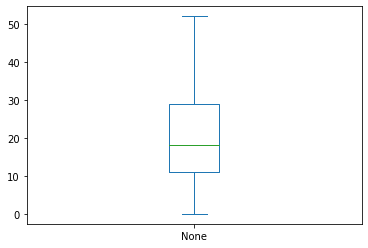

In [7]:
#calulating tweets length
tweet_len = pd.Series([len(tweet.split()) for tweet in data['clean_text']])

#distribution of tweet text lengths
tweet_len.plot(kind='box')

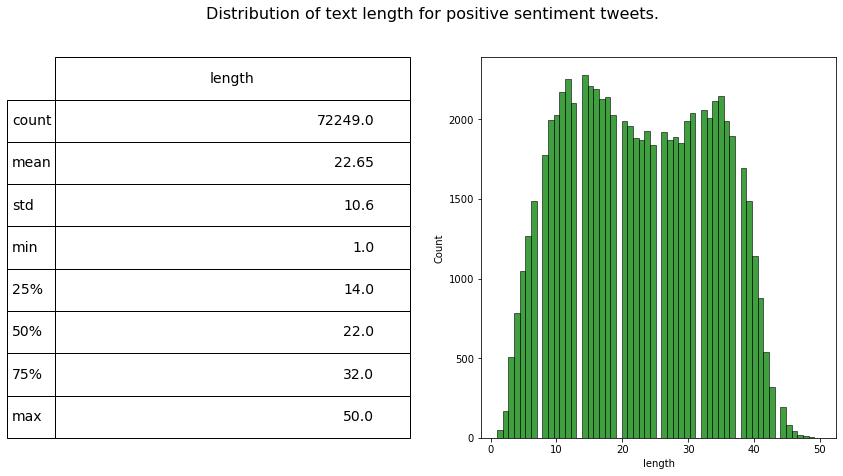

In [8]:
#plotting the distribution of text length for positive sentiment tweets
fig = plt.figure(figsize=(14,7))
data['length'] = data.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['category']=='Positive']['length'], ax=ax1,color='green')
describe = data.length[data.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size=14
bbox = [0,0,1,1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)
plt.show()

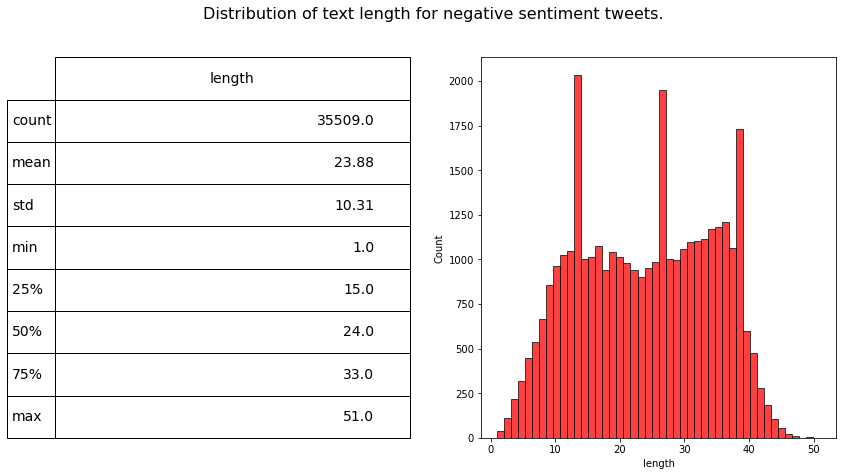

In [9]:
#plotting the distribution of text length for negative sentiment tweets
fig = plt.figure(figsize=(14,7))
data['length'] = data.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['category']=='Negative']['length'], ax=ax1,color='red')
describe = data.length[data.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size=14
bbox = [0,0,1,1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)
plt.show()

In [10]:
labels=['Negative','Neutral','Positive']
sizes=[]
colors = ['red','yellow','green']
p=0
n=0
N=0
for i in data['category']:
    if i=='Negative':
        n+=1
    elif i=='Positive':
        p+=1
    else:
        N+=1
sizes.append(n)
sizes.append(N)
sizes.append(p)


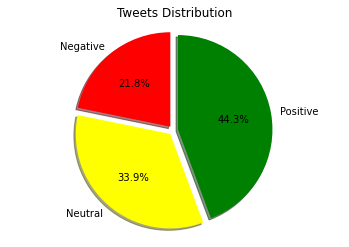

In [11]:
#pie chart for tweets
explode = (0.05, 0.05, 0.05)
plt.pie(sizes,explode = explode,colors=colors,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title("Tweets Distribution")
plt.show()

In [12]:
data.drop(['length'],axis=1,inplace=True)
data.head

<bound method NDFrame.head of                                                clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...  Negative
162976  dear rss terrorist payal gawar what about modi...  Negative
162977  did you cover her interaction forum where she ...   Neutral
162978  there big project came into india modi dream p...   Neutral
162979  have you ever listen about like gurukul where ...  Positive

[162969 rows x 2 columns]>

In [13]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
def clean_text(text):
    text = emoji.demojize(text)
    text = re.sub(r"http\S+|www\S+|@\S+", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    words = word_tokenize(text.lower())  
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word not in string.punctuation]

    return " ".join(words)
data["clean_text"] = data["clean_text"].apply(clean_text)

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) 
Y = encoder.fit_transform(data[['category']])


In [16]:
X=data['clean_text']
print(X[0])
print(Y[0])

modi promised minimum government maximum governance expected begin difficult job reforming state take year get justice state business exit psus temple
[1. 0. 0.]


In [17]:
import gensim.downloader as api

# Step 1: Load GloVe Embeddings (Pretrained)
glove_model = api.load("glove-wiki-gigaword-50")  # 50-dim GloVe embeddings

y = pd.get_dummies(data['category'])

# First split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(data["clean_text"], y, test_size=0.3, random_state=42)

# Extract validation set (1000 samples) from train
valid_size = 1000
X_valid, y_valid = X_train[-valid_size:], y_train[-valid_size:]
X_train, y_train = X_train[:-valid_size], y_train[:-valid_size]

print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_valid.shape, y_valid.shape)
print('Test Set ->', X_test.shape, y_test.shape)


Train Set -> (113078,) (113078, 3)
Validation Set -> (1000,) (1000, 3)
Test Set -> (48891,) (48891, 3)


In [18]:
import pickle

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

max_words = 5000  
max_len = 50  

# Function to tokenize and pad sequences
def tokenize_pad_sequences(text):
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)  # Fit only on training data

    # Convert text to sequences
    X = tokenizer.texts_to_sequences(text)

    # Pad sequences
    X = pad_sequences(X, padding='post', maxlen=max_len)
    
    return X, tokenizer

# Apply tokenization & padding
X_train, tokenizer = tokenize_pad_sequences(X_train)
X_valid = pad_sequences(tokenizer.texts_to_sequences(X_valid), maxlen=max_len, padding='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post')

# Save Tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Step 4: Create Word Embedding Matrix
embedding_dim = 100  # GloVe vector size
embedding_index = {}

# Load pre-trained GloVe embeddings
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

# Create embedding matrix
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= max_words:
        continue
    vector = embedding_index.get(word)
    if vector is not None:
        embedding_matrix[i] = vector  # Assign GloVe vector if found

print("✅ GloVe Embeddings Loaded!")


✅ GloVe Embeddings Loaded!


In [20]:
print(len(X[0]),len(data['clean_text'][0]))

150 150


In [21]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, 50)
print("X_valid shape:", X_valid.shape)  # Should be (num_samples, 50)


X_train shape: (113078, 50)
X_valid shape: (1000, 50)


In [22]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall


def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)  # Convert probabilities to binary values
    tp = K.sum(K.cast(y_true * y_pred, 'float32'))  # True Positives
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float32'))  # False Positives
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float32'))  # False Negatives

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    
    return 2 * (precision * recall) / (precision + recall + K.epsilon())

# Hyperparameters
vocab_size = 5000  # Ensure this matches tokenizer's vocab size
embedding_size = 100  # Match GloVe embedding dimension
max_len = 50  # Sequence length

# Build model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy', Precision(), Recall(), f1_score])

# Train model
num_epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                    batch_size=batch_size, epochs=num_epochs, verbose=1)


Epoch 1/10
3534/3534 [==============================] - 104s 28ms/step - loss: 0.4796 - accuracy: 0.8397 - precision: 0.8696 - recall: 0.8021 - f1_score: 0.8213 - val_loss: 0.3753 - val_accuracy: 0.8830 - val_precision: 0.8905 - val_recall: 0.8780 - val_f1_score: 0.8839
Epoch 2/10
3534/3534 [==============================] - 99s 28ms/step - loss: 0.3545 - accuracy: 0.8961 - precision: 0.9030 - recall: 0.8872 - f1_score: 0.8949 - val_loss: 0.3652 - val_accuracy: 0.8870 - val_precision: 0.8915 - val_recall: 0.8790 - val_f1_score: 0.8863
Epoch 3/10
3534/3534 [==============================] - 103s 29ms/step - loss: 0.3129 - accuracy: 0.9064 - precision: 0.9148 - recall: 0.8964 - f1_score: 0.9054 - val_loss: 0.3990 - val_accuracy: 0.8820 - val_precision: 0.8907 - val_recall: 0.8800 - val_f1_score: 0.8864
Epoch 4/10
3534/3534 [==============================] - 121s 34ms/step - loss: 0.2719 - accuracy: 0.9177 - precision: 0.9287 - recall: 0.9069 - f1_score: 0.9175 - val_loss: 0.3849 - val_ac

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           500000    
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            19264     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 64)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 25, 128)          66048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                2

In [24]:
# Evaluate model on the test set
loss, accuracy, precision, recall,f1 = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8614
Precision : 0.8668
Recall    : 0.8562
F1 Score  : 0.9286


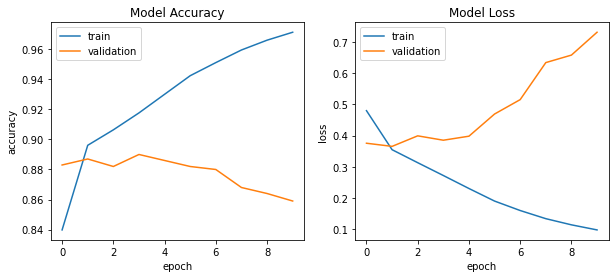

In [25]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

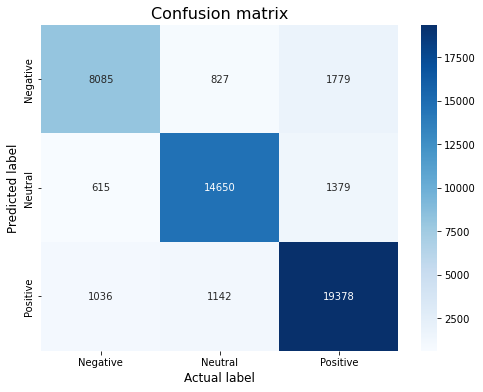

In [26]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the model
model = load_model("Models/best_model.keras", compile=False)

# ✅ Recompile with the same loss and metrics (adjust if needed)
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# ✅ Re-save in correct format
model.save("Models/best_model.keras")


In [32]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import pickle


def f1_score(y_true, y_pred):
    precision = Precision()(y_true, y_pred)
    recall = Recall()(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall + K.epsilon())

# Load the model with custom objects
model = load_model('Models/best_model.keras', custom_objects={'f1_score': f1_score})

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define sentiment classes
sentiment_classes = ['Negative', 'Neutral', 'Positive']
max_len = 50  # Ensure it matches the model input length

def predict_class(text):
    """
    Predict the sentiment class of the given text.
    
    Args:
        text (str or list): Input text or list of texts
    
    Returns:
        str or list: Predicted sentiment(s)
    """

    # Ensure input is a list (for batch processing)
    if isinstance(text, str):
        text = [text]

    # Convert text to sequences
    xt = tokenizer.texts_to_sequences(text)
    
    # Pad sequences to ensure uniform input size
    xt = pad_sequences(xt, padding='post', maxlen=max_len)

    # Predict sentiment
    yt = model.predict(xt)
    predictions = yt.argmax(axis=1)

    # Return predictions as labels
    return [sentiment_classes[pred] for pred in predictions]

# Example usage
text_input = "I love this product, it's amazing!"
predicted_sentiment = predict_class(text_input)
print(f"Predicted Sentiment: {predicted_sentiment[0]}")


Predicted Sentiment: Positive


In [33]:
predict_class(['"This is the worst day of my life'])

['Negative']

In [34]:
predict_class(['"hello how are you'])

['Neutral']

In [35]:
predict_class(['"always be happy'])

['Positive']

In [ ]:
# import urllib.request

# url = "http://nlp.stanford.edu/data/glove.6B.zip"
# destination = "C:\\Users\\goyal\\Desktop\\Sentiment-Analysis-master\\glove.6B.zip"

# print("Downloading GloVe embeddings...")
# urllib.request.urlretrieve(url, destination)
# print("Download complete!")
